### Cab booking project
Cab booking system is the process where renting a cab is automated through an app throughout a city. Using this app, people can book a cab from one location to another location. Being a cab booking app company, exploiting the understanding of cab supply and demand could increase the efficiency of their service and enhance user experience by minimizing waiting time.
Objective of this project is to combine historical usage pattern along with the open data sources like weather data to forecast cab booking demand in a city

### Data
You will be provided with hourly renting data span of two years. Data is randomly divided into train and test set. You must predict the total count of cabs booked in each hour covered by the test set, using the information available prior to the booking period. You need to append the train_label dataset to train.csv as ‘Total_booking’ column.
Please find the descriptions of the columns present in the dataset as below.
* **datetime** - hourly date + timestamp
* **season** - spring, summer, autumn, winter
* **holiday** - whether the day is considered a holiday
* **workingday** - whether the day is neither a weekend nor holiday
* **weather** - Clear , Cloudy, Light Rain, Heavy 
* **temp** - temperature in Celsius
* **atemp** - "feels like" temperature in Celsius
* **humidity** - relative humidity
* **windspeed** - wind speed
* **Total_booking** - number of total booking

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [4]:
train = pd.read_csv("train.csv")
train_label = pd.read_csv("train_label.csv", header = None)
test = pd.read_csv("test.csv")

In [5]:
print(train.shape)
train.head()

(8708, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [6]:
print(train_label.shape)
train_label.head()

(8708, 1)


,0
0,504
1,5
2,139
3,209
4,184


In [7]:
test.shape

(2178, 9)

In [8]:
train['Total_booking'] = train_label[0]

In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


### Task 1 (EDA):
1. Visualize data using different visualizations to generate interesting insights.
2. Outlier Analysis
3. Missing value analysis
4. Visualizing Total_booking Vs other features to generate insights
5. Correlation Analysis

#### Datetime column - creating addtional features

In [13]:
import calendar
print(datetime.strptime('5/23/2022', '%m/%d/%Y').weekday())
print(calendar.day_name[datetime.strptime('5/23/2022', '%m/%d/%Y').weekday()])
print(calendar.day_name[4])


0
Monday
Friday


In [14]:
print(datetime.strptime('5/22/2022', '%m/%d/%Y').month)
print(calendar.month_name[datetime.strptime('5/22/2022', '%m/%d/%Y').month])

5
May


In [15]:
print('5/2/2012 19:00'.split()[0])
print('5/2/2012 19:00'.split()[1])

5/2/2012
19:00


In [16]:
train['date'] = train['datetime'].apply(lambda a : a.split()[0])
train['hour'] = train['datetime'].apply(lambda a : a.split()[1])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19:00
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4:00
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9:00
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16:00
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13:00


In [17]:
train['weekday'] = train['date'].apply(lambda a: calendar.day_name[datetime.strptime(a, '%m/%d/%Y').weekday()])
train['month'] = train['date'].apply(lambda a: calendar.month_name[datetime.strptime(a, '%m/%d/%Y').month])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19:00,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4:00,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9:00,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16:00,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13:00,Tuesday,September


In [ ]:
# do the same with test data

#### Converting categorical features to categorical data type

In [18]:
# convert column types to categorical (season etc)
train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
date              object
hour              object
weekday           object
month             object
dtype: object

In [19]:
train['season'] = train['season'].astype('category')
train.dtypes

datetime           object
season           category
holiday             int64
workingday          int64
weather            object
temp              float64
atemp             float64
humidity            int64
windspeed         float64
Total_booking       int64
date               object
hour               object
weekday            object
month              object
dtype: object

In [ ]:
# Convert other features (where necessary) to categorical

In [20]:
train = train.drop(['datetime'], axis=1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19:00,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4:00,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9:00,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16:00,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13:00,Tuesday,September


#### Checking for missing values

In [ ]:
# import missingno as msno
# msno.bar(train, figsize=(12,5))

In [21]:
train.isna().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
date             0
hour             0
weekday          0
month            0
dtype: int64

#### Checking for  unique values

In [24]:
# check for unique values in featuers
train.season.unique()

['Summer', 'Fall', 'Spring', 'Winter']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

In [25]:
train.weather.unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

#### Checking for outliers

<AxesSubplot:ylabel='Total_booking'>

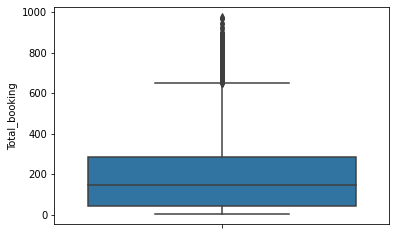

In [22]:
sns.boxplot(data=train, y='Total_booking', orient='v')

<AxesSubplot:xlabel='season', ylabel='Total_booking'>

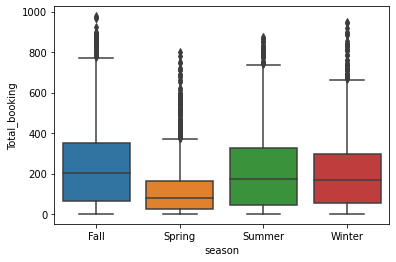

In [23]:
sns.boxplot(data=train, y='Total_booking', x='season', orient='v')

In [ ]:
# visualize boxplots (outliers) for hour, working day...

In [ ]:
# Mention your inference from the box plots 

#### Dealing with outliers

In [ ]:
# remove outliers (for Total booking)  ---> 

# total bookings above 3*(mean of total bookings)

# or

# below Q1-1.5*IQR and above Q3+1.5*IQR
# filtering newTrain = train[(train.Total_booking > lowercutoff) and (train.Total_booking < highercutoff)]

#### Co-relation analysis

In [ ]:
#co-relation analysis - do it only for relevant columns totalBooking, temp, atemp, humidity, windspeed, hour...
#trainpartial = train[['a','b',....]]
traincorr = trainpartial.corr()
sns.heatmap(traincorr)

In [ ]:
# inference of correlation...

In [ ]:
# manage features that are highly corelated
# remove features that have very low correlation with the label (target)

#### Visualization

In [ ]:
# boxplot

In [ ]:
# Line plots, bar plots???
# line plot, each line for totalbookings per hour - one line for each season  (hint: may want to use groupby)

### Task 2:
1. Feature Engineering
2. Grid search
3. Regression Analysis
4. Ensemble Model

#### Pre-processing

In [26]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'date', 'hour', 'weekday',
       'month'],
      dtype='object')

In [ ]:
# one hot encoding of categorical features - season, weekday,month....
# 1. columnEncoded = get_dummies(train[column])
# 2. add the encoded columns to the df
# 3. drop the oringinal column

#### Train data and Testing data

In [ ]:
#train, test are given separately....no need to split
# all the above steps can be done either by creating full data from train + test and then finally splitting full data into train and test
# or maintaining train and test as separate data, and doing all the above operations on both train and test data

#### ML Modeling

In [ ]:
# Try a few models on your data ...which models??
# is this a classfication problem or a regression problem??

#Regression -- because we need to predict total no. of bookings given the other features...and total no. of bookings can take any any value.


In [ ]:
# Regression models:
# Linear Regression, Ridge, Lasso
# SVR - from sklearn.svm
# KNeighborsRegressor from sklearn.neighbors

# Ensemble models
# RandomForestRegressor, Bagging Regressor, GradientBoostingRegressor - from sklearn.ensemble


# testy = pd.read_csv('test_label.csv')
# rgr = RandomForestRegressor()
# rgr.fit(train data)
# ypred = rgr.predict(test)
# mse = mean_squared_error(y_actual, ypred)

# create a evaluation dataframe with columns 'model', 'mse'

In [ ]:
# GridSearchCV --> to tune parameters for each of the models

In [ ]:
# Inference -- which model with what parameters give you best results from the above

### Results:
